In [1]:
import pandas as pd
# Load dataset
df = pd.read_csv('bank_transactions.csv')
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [2]:
print("Original DataFrame Shape:", df.shape)
print(df.head())  # Show the first few rows

Original DataFrame Shape: (1048567, 9)
  TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053     10/1/94          F   JAMSHEDPUR   
1            T2   C2142763      4/4/57          M      JHAJJAR   
2            T3   C4417068    26/11/96          F       MUMBAI   
3            T4   C5342380     14/9/73          F       MUMBAI   
4            T5   C9031234     24/3/88          F  NAVI MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05          2/8/16           143207   
1             2270.69          2/8/16           141858   
2            17874.44          2/8/16           142712   
3           866503.21          2/8/16           142714   
4             6714.43          2/8/16           181156   

   TransactionAmount (INR)  
0                     25.0  
1                  27999.0  
2                    459.0  
3                   2060.0  
4                   1762.5  


# Task A1: Identify and Remove Null Values

In [3]:
# Check for missing values
print(df.isnull().sum())

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64


### As we can see there are 4 cloumsn who has missing values

In [4]:
# Drop rows where critical transaction columns are missing
df_cleaned = df.dropna(subset=['TransactionID', 'CustomerID', 'TransactionAmount (INR)'])

# Convert CustomerDOB to datetime format
df_cleaned['CustomerDOB'] = pd.to_datetime(df_cleaned['CustomerDOB'], errors='coerce')

# Drop rows where CustomerDOB is NaT (invalid/missing dates)
df_cleaned = df_cleaned[df_cleaned['CustomerDOB'].notna()]

# Drop rows where CustGender, CustLocation, or CustAccountBalance are missing
df_cleaned = df_cleaned[df_cleaned[['CustGender', 'CustLocation', 'CustAccountBalance']].notna().all(axis=1)]

# Print final shape
print("Final Cleaned Shape:", df_cleaned.shape)

# Display sample data
print(df_cleaned.head())

/var/folders/sy/yh56pzc53gq3dbx96tf_j5vr0000gn/T/ipykernel_1667/2419726795.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['CustomerDOB'] = pd.to_datetime(df_cleaned['CustomerDOB'], errors='coerce')


Final Cleaned Shape: (1041614, 9)
  TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053  1994-10-01          F   JAMSHEDPUR   
1            T2   C2142763  2057-04-04          M      JHAJJAR   
2            T3   C4417068  1996-11-26          F       MUMBAI   
3            T4   C5342380  2073-09-14          F       MUMBAI   
4            T5   C9031234  1988-03-24          F  NAVI MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05          2/8/16           143207   
1             2270.69          2/8/16           141858   
2            17874.44          2/8/16           142712   
3           866503.21          2/8/16           142714   
4             6714.43          2/8/16           181156   

   TransactionAmount (INR)  
0                     25.0  
1                  27999.0  
2                    459.0  
3                   2060.0  
4                   1762.5  


### We have removed the rows with the null values for better analysis.

# Task A2: Identify and Remove Invalid Transaction Amount Values

In [5]:
# Check for invalid transaction amounts
invalid_transactions = df_cleaned[df_cleaned['TransactionAmount (INR)'] <= 0]
print("Invalid transactions count:", len(invalid_transactions))

Invalid transactions count: 820


### So after removing missing data we have finally got there are 820 rows who have invalid Transaction. We need to clean it for better analysis.

In [6]:
# Remove invalid transactions
df_cleaned = df_cleaned[df_cleaned['TransactionAmount (INR)'] > 0]

# Task A3: Identify and Remove Invalid Age Values

In [7]:
from datetime import datetime
import pandas as pd

# Ensure a copy to avoid SettingWithCopyWarning
df_cleaned = df_cleaned.copy()

# Convert CustomerDOB to datetime safely
df_cleaned['CustomerDOB'] = pd.to_datetime(df_cleaned['CustomerDOB'], errors='coerce')

# Drop rows with missing DOB
df_cleaned = df_cleaned.dropna(subset=['CustomerDOB'])

# Calculate Age more robustly
current_date = datetime.now()
df_cleaned['age'] = (current_date - df_cleaned['CustomerDOB']).dt.days // 365  # Convert days to years

# Filter only valid age range (18-100)
df_cleaned = df_cleaned[(df_cleaned['age'] >= 18) & (df_cleaned['age'] <= 100)]

# Print final dataset shape
print("Final Cleaned Shape:", df_cleaned.shape)

# Show the first few rows
print(df_cleaned[['CustomerDOB', 'age']].head())


Final Cleaned Shape: (879715, 10)
  CustomerDOB  age
0  1994-10-01   30
2  1996-11-26   28
4  1988-03-24   37
6  1992-01-26   33
7  1982-01-27   43


# Task A4: Display the 5 Top Locations with Maximum Transactions

In [8]:
# Count transactions per location
top_locations = df_cleaned['CustLocation'].value_counts().head(5)

# Display results
print("Top 5 locations with maximum transactions:")
print(top_locations)

Top 5 locations with maximum transactions:
CustLocation
MUMBAI       86277
BANGALORE    70699
NEW DELHI    66172
GURGAON      62746
DELHI        60490
Name: count, dtype: int64


# Task A5: Calculate RFM Values

In [9]:
import pandas as pd

# Specify date format explicitly (adjust format if needed)
df_cleaned['TransactionDate'] = pd.to_datetime(df_cleaned['TransactionDate'], format='%d/%m/%Y', errors='coerce')

# Set reference date (Assume max transaction date as today)
reference_date = df_cleaned['TransactionDate'].max()

# Calculate RFM Metrics per Customer
rfm_df = df_cleaned.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (reference_date - x.max()).days,  # Recency (Days since last transaction)
    'TransactionID': 'count',  # Frequency (Number of transactions)
    'TransactionAmount (INR)': 'sum'  # Monetary (Total amount spent)
})

# Rename columns
rfm_df.rename(columns={
    'TransactionDate': 'Recency',
    'TransactionID': 'Frequency',
    'TransactionAmount (INR)': 'Monetary'
}, inplace=True)

# Display first few rows
print(rfm_df.head())

            Recency  Frequency  Monetary
CustomerID                              
C1010011        NaN          2    5106.0
C1010012        NaN          1    1499.0
C1010014        NaN          2    1455.0
C1010018        NaN          1      30.0
C1010028        NaN          1     557.0


# Task A6: Check Distribution of RFM Values

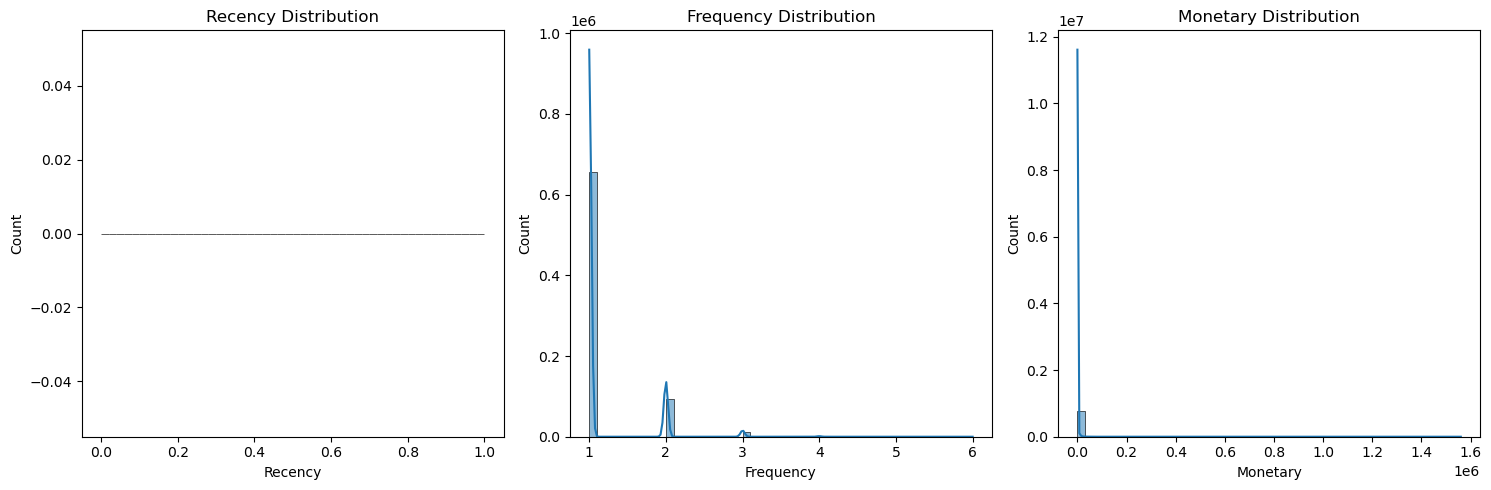

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of RFM values
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(rfm_df['Recency'], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Recency Distribution")

sns.histplot(rfm_df['Frequency'], bins=50, kde=True, ax=axes[1])
axes[1].set_title("Frequency Distribution")

sns.histplot(rfm_df['Monetary'], bins=50, kde=True, ax=axes[2])
axes[2].set_title("Monetary Distribution")

plt.tight_layout()
plt.show()


# Task A7: Handle Skewness

### RFM data is usually right-skewed (many customers have low frequency/monetary values).
### We apply log transformation to normalize it.

In [11]:
import numpy as np

# Apply log transformation to reduce skewness
rfm_df['Recency_log'] = np.log1p(rfm_df['Recency'])
rfm_df['Frequency_log'] = np.log1p(rfm_df['Frequency'])
rfm_df['Monetary_log'] = np.log1p(rfm_djf['Monetary'])

# Plot transformed distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(rfm_df['Recency_log'], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Recency (Log Transformed)")

sns.histplot(rfm_df['Frequency_log'], bins=50, kde=True, ax=axes[1])
axes[1].set_title("Frequency (Log Transformed)")

sns.histplot(rfm_df['Monetary_log'], bins=50, kde=True, ax=axes[2])
axes[2].set_title("Monetary (Log Transformed)")

plt.tight_layout()
plt.show()


NameError: name 'rfm_djf' is not defined

### Discussion on Skewness
Issue: The raw RFM values were right-skewed (many customers had low values).


Solution: Log transformation reduced skewness, making the data more normally distributed, which helps in clustering and segmentation.

# Now that we've calculated Recency, Frequency, and Monetary (RFM) values, the next step is to segment customers using K-Means clustering.

## Task B1: Why Use K-Means for Customer Segmentation?
K-Means is a clustering algorithm that groups similar customers together based on their RFM values.

Why is K-Means appropriate?

Unsupervised Learning: No predefined labels—groups (clusters) are found automatically.

Scalability: Works well with large datasets (e.g., 800K+ customers).

Interpretable Clusters: Creates well-separated groups based on customer purchasing behavior.

Useful for Marketing: Segmentation helps in personalized marketing, promotions, and customer retention strategies.

Limitations:

K-Means assumes clusters are spherical and of similar size, which may not always be true.

It requires defining the number of clusters (K-value) in advance.

## Task B2: Choosing the Best Value of K (Number of Clusters)

Before applying K-Means, we need to determine the optimal number of clusters (K).

Elbow Method:

Plots the Within-Cluster Sum of Squares (WCSS) for different values of K.

Choose the K where the "elbow" (sharp bend) occurs.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Normalize the RFM data (important for K-Means)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df[['Recency_log', 'Frequency_log', 'Monetary_log']])

# Try different values of K
wcss = []  # Store Within-Cluster Sum of Squares
K_range = range(2, 11)  # Testing K values from 2 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)  # WCSS score for each K

# Plot the Elbow Method graph
plt.plot(K_range, wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()


In [ ]:
print(rfm_df.head())